In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()

In [3]:
# Lendo o vídeo
cap = cv2.VideoCapture('entrada.avi')

In [4]:
# Salvando os frames para um numpy array
frames = []
while cap.isOpened():
    ret, frame = cap.read()
    if ret == False:
        print('*** Video ended ***')
        break
        
    frames.append(frame)

frames = np.array(frames)

*** Video ended ***


In [5]:
# Escolhendo um frame para realizar as análises
frame = frames[120]

In [6]:
# Passando o frame escolhido para tons de cinza
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

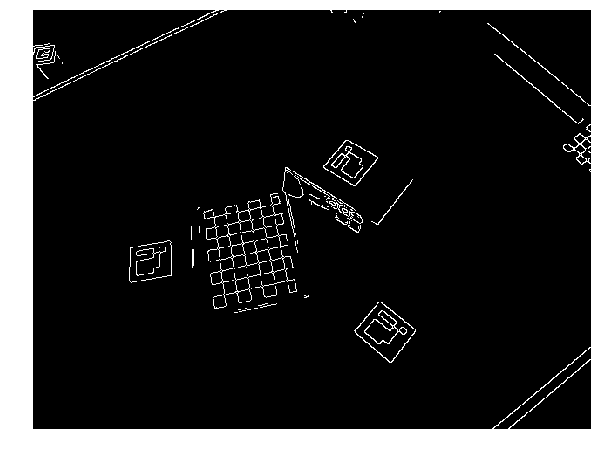

In [7]:
# Aplicando Canny para detecção de bordas
canny = cv2.Canny(gray, 200, 255, 2)
show(canny)

In [28]:
# Aplicando Harris para detecção de quinas
gray = np.float32(gray)
harris = cv2.cornerHarris(gray, 2, 3, 0.04) 

# Extraindo pontos de quina
pts = harris > 0.01 * harris.max()
pts_quina = [tuple((y, x)) for x,y in np.argwhere(pts == True)]

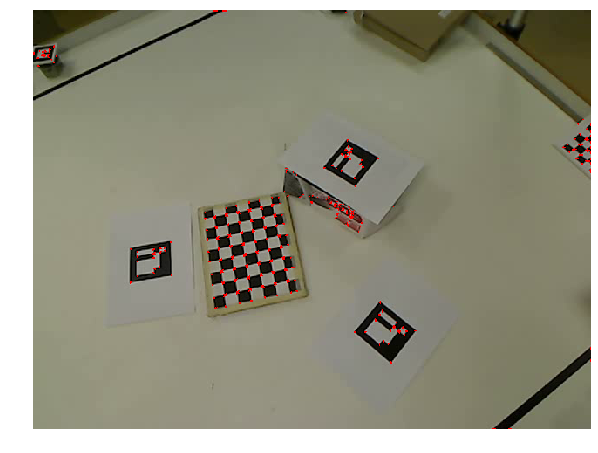

In [29]:
# Exibindo em vermelho os pontos de quina
img = frame.copy()
img[pts] = [0, 0, 255]
show(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

1543


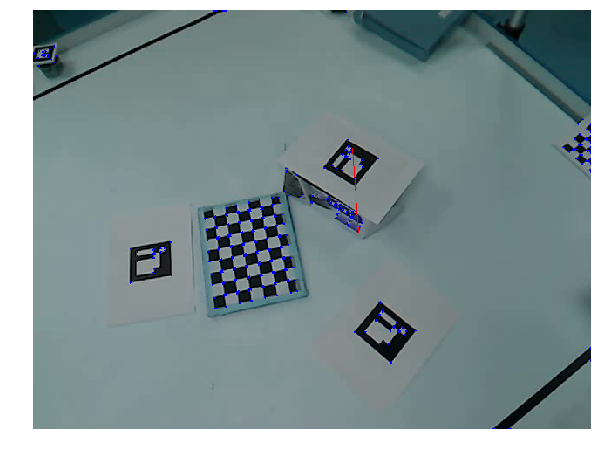

In [32]:
print(len(pts_quina))
show(cv2.line(img, pts_quina[190], pts_quina[800], color=255))

In [ ]:
# # Lendo o vídeo
# cap = cv2.VideoCapture('entrada.avi')

# # Exibindo o vídeo
# while cap.isOpened():
#     # Lendo o frame
#     ret, frame = cap.read()
#     if ret == False:
#         print('*** Video ended ***')
#         break
    
#     # Passando o frame lido para tons de cinza
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
#     # Aplicando Canny para detecção de bordas
#     canny = cv2.Canny(gray, 200, 255, 3)
    
#     # Aplicando Harris para detecção de quinas
#     gray = np.float32(gray)
#     harris = cv2.cornerHarris(gray, 2, 3, 0.04) 
    
#     # Pontos de quina
#     pts = harris > 0.01 * harris.max()
#     pts_quina = np.argwhere(pts == True)
    
#     # Colorindo nosso frame de preto ou branco (onde for quina)
#     frame[pts] = [255,255,255]
    
#     # Exibindo o frame
#     cv2.imshow('Teste', harris)
    
#     if cv2.waitKey(60) == 27:
#         print('*** Video stopped by user ***')
#         break
        
# cap.release()
# cv2.destroyAllWindows()